In [4]:
from time import sleep
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from p5control import InstrumentGateway, DataGateway

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

In [9]:
from p5control import InstrumentGateway, DataGateway

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

name = 'IV at base'
offset_name = 'offset'
sweep_name = 'sweep'
i = 10

try:
    while True:
        gw.adwin.setAveraging(50)
        gw.femtos.set_amplification_A(100)
        gw.femtos.set_amplification_B(1000)
        gw.adwin.setAmplitude(0)
        gw.adwin.setSweeping(False)
        m = gw.measure(f"{name}/{i:07d}/{offset_name}")
        sleep(.5)
        m.start()
        sleep(3)
        m.stop()

        for j in range(5):
            gw.adwin.setAmplitude(8)
            gw.adwin.setFrequency(0.053)
            gw.adwin.setLockinAmplitude(.1)
            gw.adwin.setLockinFrequency(73.3)
            m = gw.measure(f"{name}/{i:07d}/{sweep_name}_{j}")
            
            sleep(.5)
            m.start()
            gw.adwin.setSweeping(True)
            sleep(20)
            m.stop()

            sleep(1)
            gw.adwin.setSweeping(False)

        i+=1
except KeyboardInterrupt:
    try:
        m.stop()
    except:
        pass

In [3]:
from datetime import datetime
import numpy as np
timestamp = 1683599443.2752402

dt_object = datetime.fromtimestamp(timestamp)
print(dt_object)

2023-05-09 04:30:43.275240


In [10]:
from p5control import InstrumentGateway, DataGateway

gw = InstrumentGateway()
dgw = DataGateway()

gw.connect()
dgw.connect()

name = 'IV at base'
offset_name = 'offset'
sweep_name = 'sweep'

gw.adwin.setAveraging(50)
gw.femtos.set_amplification_A(100)
gw.femtos.set_amplification_B(1000)
gw.adwin.setAmplitude(0)
gw.adwin.setSweeping(False)
m = gw.measure(f"{name}/{offset_name}")
sleep(.5)
m.start()
sleep(3)
m.stop()

gw.adwin.setAmplitude(8)
gw.adwin.setFrequency(0.053)
gw.adwin.setLockinAmplitude(.1)
gw.adwin.setLockinFrequency(73.3)
m = gw.measure(f"{name}/{sweep_name}_{j}")

sleep(.5)
m.start()
gw.adwin.setSweeping(True)
sleep(100)
m.stop()

sleep(1)
gw.adwin.setSweeping(False)

In [53]:
offset = dgw.get_data(f"/measurement/{name}/{offset_name}/adwin")
sweep = dgw.get_data(f"/measurement/{name}/{sweep_name}_1/adwin")

import matplotlib.pyplot as plt

off_V1 = np.mean(offset['V1'])
off_V2 = np.mean(offset['V2'])

t = sweep['time']

V1 = sweep['V1'] - off_V1
V2 = sweep['V2'] - off_V2

voltage = V1 / 1000 #FemtoB [V]
current = V2 / 100 * 100 / 47000 # FemtoA, VD, R_ref [A]

trigger = sweep['trigger']

new_trig = np.copy(trigger)
new_time = np.copy(t)
new_trig = np.array(new_trig, dtype='float64')
new_trig[new_trig<1] = np.nan
new_trig = new_trig%2
new_trig = np.abs(new_trig[1:]-new_trig[:-1])
new_time = t[1:]
new_time[new_trig==0] = np.nan
new_trig[new_trig==0] = np.nan

new_trig = new_trig[~np.isnan(new_trig)]
new_time = new_time[~np.isnan(new_time)]

print(off_V1, off_V2)



-4.121252697599132e-05 0.11136608186660259


ValueError: x and y must have same first dimension, but have shapes (301964,) and (10,)

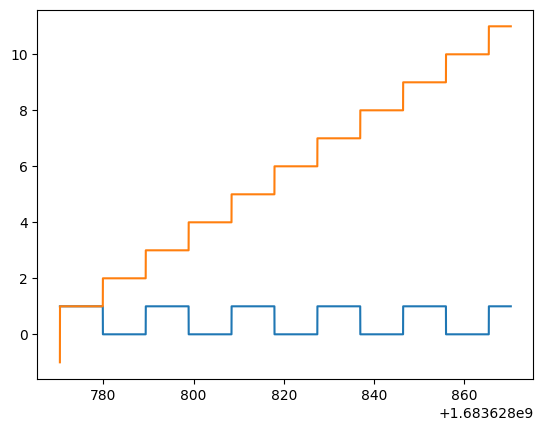

In [54]:
plt.plot(t, trigger%2)
plt.plot(t, trigger)
plt.plot(new_time, new_trig, 'x')